In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


Text(0, 0.5, 'Y dataset')

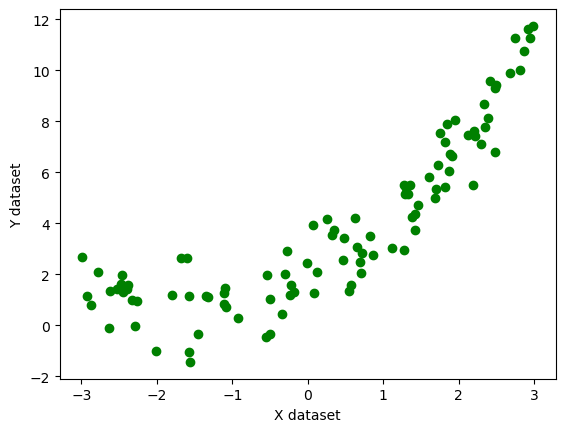

In [45]:
X = 6 * np.random.rand(100, 1) - 3
Y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,Y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [48]:
regression_1.fit(X_train,Y_train)

LinearRegression()

In [49]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,regression_1.predict(X_test))
score

0.7258705804036736

Text(0, 0.5, 'Y')

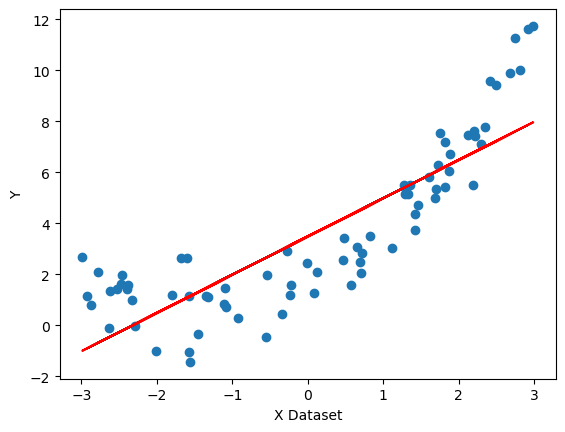

In [50]:
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,Y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")


In [51]:
## Apply polynomial transformation
## use to increase the degree
from sklearn.preprocessing import PolynomialFeatures


In [52]:
poly = PolynomialFeatures(degree=3, include_bias=True)


In [53]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [54]:
X_train_poly

array([[ 1.00000000e+00, -2.45497801e+00,  6.02691702e+00,
        -1.47959487e+01],
       [ 1.00000000e+00,  1.42175129e+00,  2.02137674e+00,
         2.87389499e+00],
       [ 1.00000000e+00,  1.87696770e+00,  3.52300774e+00,
         6.61257174e+00],
       [ 1.00000000e+00,  1.27251368e+00,  1.61929106e+00,
         2.06057002e+00],
       [ 1.00000000e+00, -2.86836657e+00,  8.22752678e+00,
        -2.35995628e+01],
       [ 1.00000000e+00, -1.09137767e+00,  1.19110521e+00,
        -1.29994562e+00],
       [ 1.00000000e+00,  1.81861705e+00,  3.30736796e+00,
         6.01483574e+00],
       [ 1.00000000e+00,  6.51406409e-01,  4.24330310e-01,
         2.76411483e-01],
       [ 1.00000000e+00,  2.67981814e+00,  7.18142524e+00,
         1.92449136e+01],
       [ 1.00000000e+00, -1.79852972e+00,  3.23470914e+00,
        -5.81772050e+00],
       [ 1.00000000e+00,  2.41326786e+00,  5.82386176e+00,
         1.40545384e+01],
       [ 1.00000000e+00,  1.69821249e+00,  2.88392566e+00,
      

In [55]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,Y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(Y_test,y_pred)
score

0.8844735254255407

In [56]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.41212398 0.55276102 0.02690204]]
[1.66650843]


In [63]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)

regression.predict(X_new_poly)

array([[ 1.67863067],
       [ 1.64339359],
       [ 1.60872572],
       [ 1.57463149],
       [ 1.54111533],
       [ 1.50818165],
       [ 1.47583488],
       [ 1.44407945],
       [ 1.41291978],
       [ 1.38236029],
       [ 1.35240541],
       [ 1.32305957],
       [ 1.29432718],
       [ 1.26621267],
       [ 1.23872046],
       [ 1.21185498],
       [ 1.18562066],
       [ 1.16002191],
       [ 1.13506317],
       [ 1.11074885],
       [ 1.08708338],
       [ 1.06407118],
       [ 1.04171669],
       [ 1.02002431],
       [ 0.99899848],
       [ 0.97864362],
       [ 0.95896416],
       [ 0.93996451],
       [ 0.92164911],
       [ 0.90402237],
       [ 0.88708873],
       [ 0.8708526 ],
       [ 0.85531841],
       [ 0.84049058],
       [ 0.82637355],
       [ 0.81297172],
       [ 0.80028953],
       [ 0.7883314 ],
       [ 0.77710176],
       [ 0.76660502],
       [ 0.75684562],
       [ 0.74782797],
       [ 0.73955651],
       [ 0.73203565],
       [ 0.72526982],
       [ 0

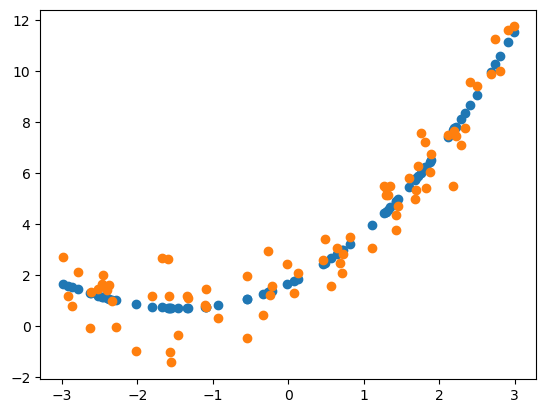

In [57]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,Y_train)

## pipeline Concepts


In [67]:
from sklearn.pipeline import Pipeline

In [68]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,Y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, Y_train, "b.", linewidth=3)
    plt.plot(X_test, Y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

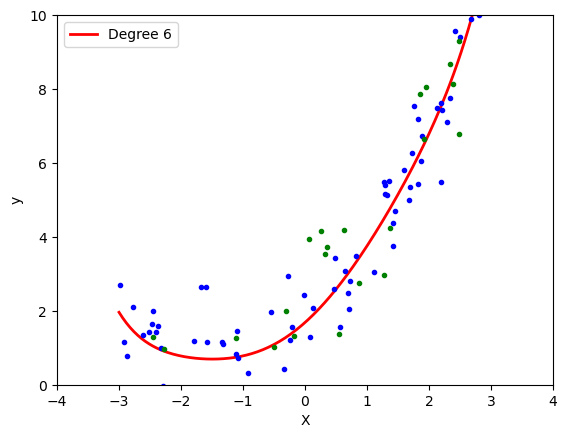

In [69]:
poly_regression(6)